<a href="https://colab.research.google.com/github/Nikhileswar-Komati/100D_ML/blob/master/Algorithms/LINEAR_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [53]:
class LinearRegressionFromScratch:
  def __init__(self, learning_rate = 0.05, n_iterations = 1000):
    self.learning_rate = learning_rate
    self.n_iterations = n_iterations
  def fit(self, x, y):
    """
    shape of x (m, f) m - no of rows, f - no of features
    shape of y (m, ) m - no of rows, column vector
    shape of weights (f, 1) - no of features
    shape of y_pred = np.dot(x, weights) is (m, f) * (f, 1) = (m, 1)
    residuals shape = (m, 1)
    gradients (residuals * x)/m so transpose x  gradients = np.dot(x.T, residuals) = (f, m) * (m, 1) = (f, 1)
    """
    self.costs = list()
    m = x.shape[0]
    self.weights = np.random.rand(x.shape[1], 1)
    for _ in range(self.n_iterations):
      y_pred = np.dot(x, self.weights)
      residuals = y_pred - y
      gradients = np.dot(x.T, residuals)
      self.weights -= (self.learning_rate / m) * gradients
      cost = np.sum((residuals ** 2)) / (2 * m)
      self.costs.append(cost)
    return self
  def predict(self, x):
    return np.dot(x, self.weights) 


In [54]:
#y = 2x1 + 2x2
train_X = np.array([[1, 1], [1, 2], [2, 1], [2, 2], [3, 1], [1, 3], [3, 2], [2, 3], [3, 3], [4, 5]])
train_Y = np.array([[4], [6], [6], [8], [8], [7], [10], [10], [12], [12]])
test_x = np.array([[2, 1], [4, 1], [0, 2]])
regressor = LinearRegressionFromScratch(n_iterations=500)
var = regressor.fit(train_X, train_Y)
y_pred = regressor.predict(test_x)
test_Y = np.array([[6], [10], [4]])
rmse1 = mean_squared_error(test_Y, y_pred)
print(y_pred)
print(rmse1)
max(var.costs)

[[ 5.77599996]
 [10.23733322]
 [ 2.6293334 ]]
0.6617433326102791


15.868279388408265

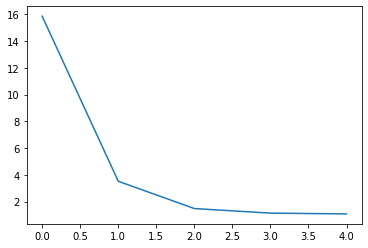

In [55]:
x_var = np.array(range(5))
y_var = np.array(var.costs[:5])
sns.lineplot(x_var, y_var)

In [56]:
np.random.seed(0)
x = np.random.rand(1000, 1)
y = 2 + 3 * x + np.random.rand(1000, 1)


regressor = LinearRegressionFromScratch(learning_rate=0.1, n_iterations=1500)
var = regressor.fit(x, y)
y_pred = regressor.predict(x)
rmse1 = mean_squared_error(y, y_pred)
print(rmse1)
var.weights

1.697492885527333


array([[6.77121242]])

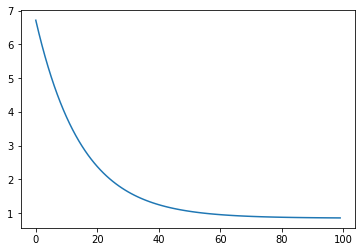

In [57]:
x_var = np.array(range(100))
y_var = np.array(var.costs[:100])
sns.lineplot(x_var, y_var)

In [70]:
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.00618965]]
Intercept: [2.50828041]
Root mean squared error:  0.08937277533486776
R2 score:  0.8951689909999495


In [79]:
class LinearRegressionFromScratch:
  def __init__(self, learning_rate = 0.01, n_iterations = 1000):
    self.learning_rate = learning_rate
    self.n_iterations = n_iterations
  def fit(self, x, y):
    """
    shape of x (m, f) m - no of rows, f - no of features
    shape of y (m, ) m - no of rows, column vector
    shape of weights (f, 1) - no of features
    shape of y_pred = np.dot(x, weights) is (m, f) * (f, 1) = (m, 1)
    residuals shape = (m, 1)
    gradients (residuals * x)/m so transpose x  gradients = np.dot(x.T, residuals) = (f, m) * (m, 1) = (f, 1)
    """
    self.costs = list()
    m = x.shape[0]
    ones = np.ones((m, 1))
    x = np.append(ones, x, axis = 1)
    print(x.shape)
    self.weights = np.random.rand(x.shape[1], 1)
    for _ in range(self.n_iterations):
      y_pred = np.dot(x, self.weights)
      residuals = y_pred - y
      gradients = np.dot(x.T, residuals)
      self.weights -= (self.learning_rate / m) * gradients
      cost = np.sum((residuals ** 2)) / (2 * m)
      if _ > 1 and self.costs[-1] == cost:
        return self
      self.costs.append(cost)
    return self
  def predict(self, x):
    ones = np.ones((x.shape[0], 1))
    x = np.append(ones, x, axis = 1)
    return np.dot(x, self.weights) 


In [80]:
np.random.seed(0)
x = np.random.rand(1000, 1)
y = 2 + 3 * x + np.random.rand(1000, 1)


regressor = LinearRegressionFromScratch(learning_rate=0.1, n_iterations=1500)
var = regressor.fit(x, y)
y_pred = regressor.predict(x)
rmse1 = mean_squared_error(y, y_pred)
print(rmse1)
var.weights

(1000, 2)
0.08937277558815401


array([[2.5083093 ],
       [3.00613529]])

In [81]:
print(rmse - rmse1)

-2.532862530824076e-10


1500

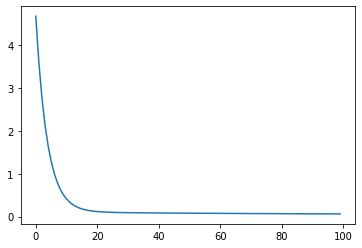

In [82]:
x_var = np.array(range(100))
y_var = np.array(var.costs[:100])
sns.lineplot(x_var, y_var)
len(var.costs)

In [78]:
var.costs[:-4:-1]

[0.04468638779578693, 0.04468638779751994, 0.044686387799276354]